In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

GPUs Available:  1


In [8]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 21s 0us/step


In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


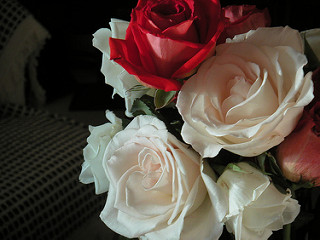

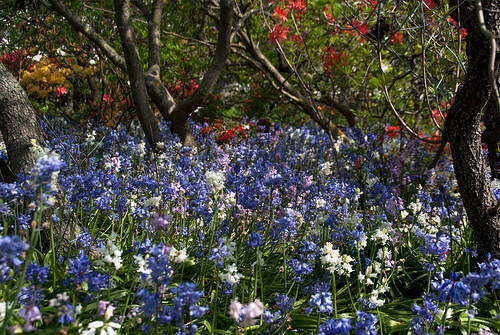

In [18]:
from IPython.display import Image
from IPython.display import display
x = PIL.Image.open(str(roses[1]))
y = PIL.Image.open(str(tulips[1]))
display(x, y)

## dataset creation

In [19]:
batch_size = 32
img_height = 180
img_width = 180

In [20]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [87]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [82]:
print(type(train_dataset.take(1)))

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


In [73]:
train_dataset.take(1).__dict__

{'_input_dataset': <BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 '_count': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 '_name': None,
 '_variant_tensor_attr': <tf.Tensor: shape=(), dtype=variant, value=<TakeDatasetOp::Dataset>>,
 '_graph_attr': <tensorflow.python.framework.ops.Graph at 0x23cd46d78b0>,
 '_options_attr': <tensorflow.python.data.ops.options.Options at 0x23f4f5070a0>}

### Tuple -> premier element du tuple -> image de tuple -> premiere image

In [165]:
[len(a) for a in list(train_dataset)[0]]

[32, 32]

In [152]:
list(train_dataset)[0][0].shape

TensorShape([32, 180, 180, 3])

In [151]:
list(train_dataset)[0][0][0].shape

TensorShape([180, 180, 3])

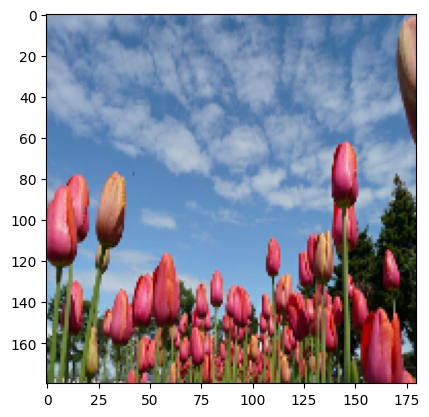

In [188]:
plt.imshow(list(train_dataset)[0][0][0].numpy().astype("uint8"))
##plt.title(class_names[labels[0]])
##plt.axis("off")


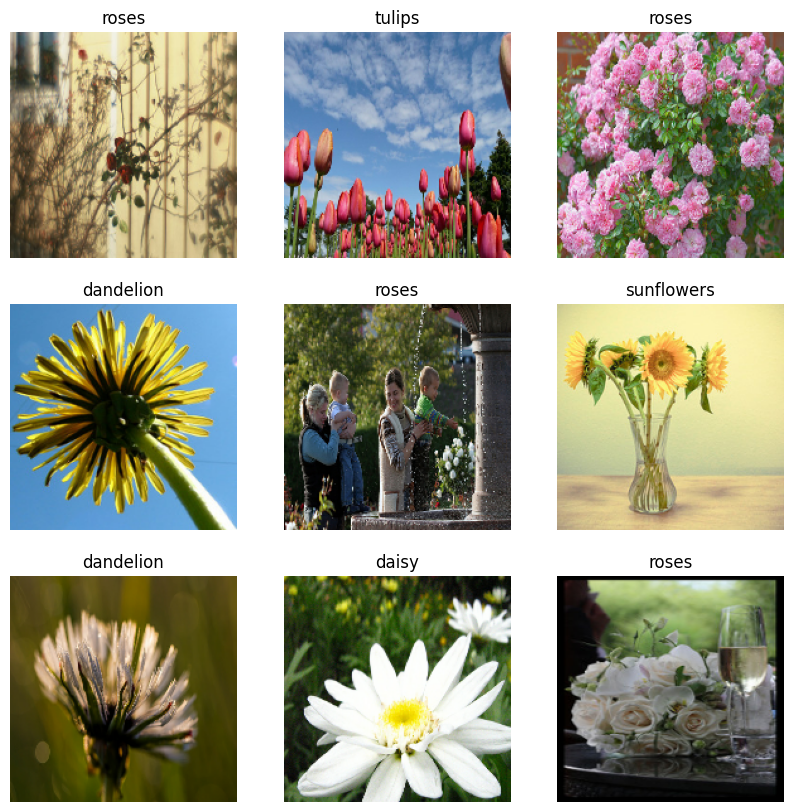

In [179]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [118]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
